In [1]:
# Import required libraries

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np


C:\Users\vivek\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
# Define image parameters

IMG_SIZE = 224      # Image size (224x224)
BATCH_SIZE = 32     # Images per batch
EPOCHS = 10         # Number of training epochs


In [3]:
# Training data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True
)

# Validation and Test data (only rescaling)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [4]:
train_generator = train_datagen.flow_from_directory(
    'chest_xray/train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    'chest_xray/val',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    'chest_xray/test',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

print("Class Indices:", train_generator.class_indices)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Class Indices: {'NORMAL': 0, 'PNEUMONIA': 1}


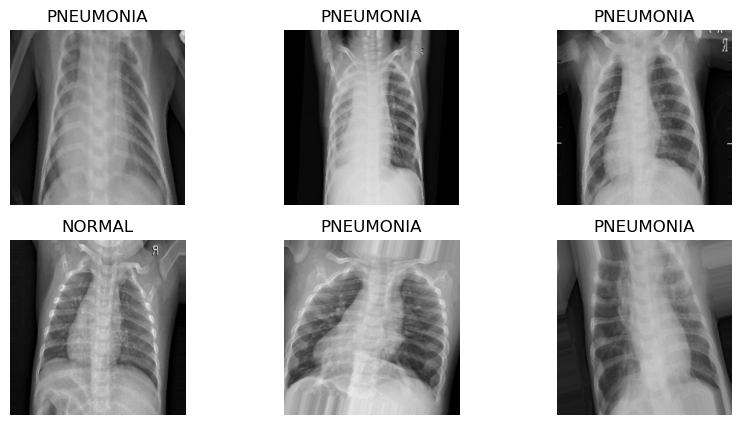

In [5]:
# Get one batch
images, labels = next(train_generator)

plt.figure(figsize=(10,5))

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i])
    plt.title("PNEUMONIA" if labels[i]==1 else "NORMAL")
    plt.axis("off")

plt.show()


In [6]:
# Build CNN model

model = Sequential()

# 1st Convolution Block
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd Convolution Block
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# 3rd Convolution Block
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten Layer
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

model.summary()


C:\Users\vivek\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [8]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 222s 1s/step - accuracy: 0.7795 - loss: 0.4633 - val_accuracy: 0.6875 - val_loss: 0.8012
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 258s 2s/step - accuracy: 0.8714 - loss: 0.2769 - val_accuracy: 0.8125 - val_loss: 0.6522
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 220s 1s/step - accuracy: 0.8792 - loss: 0.2750 - val_accuracy: 0.6875 - val_loss: 0.8173
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - accuracy: 0.8913 - loss: 0.2539 - val_accuracy: 0.7500 - val_loss: 0.7050
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - accuracy: 0.9089 - loss: 0.2248 - val_accuracy: 0.6250 - val_loss: 1.0079
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.9153 - loss: 0.2172 - val_accuracy: 0.8125 - val_loss: 0.4909
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 164s 1s/step - accuracy: 0.9109 - loss: 0.2278 - val_accuracy: 0.7500 - val_loss: 0.6174
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 163s 998ms/step - accuracy: 0.9189 - loss: 0.2089 - val_a

In [9]:
test_loss, test_accuracy = model.evaluate(test_generator)

print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)


20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 589ms/step - accuracy: 0.8590 - loss: 0.3489
Test Accuracy: 0.8589743375778198
Test Loss: 0.34891653060913086


In [10]:
model.save("pneumonia_cnn_model.h5")
print("Model Saved Successfully!")


Model Saved Successfully!


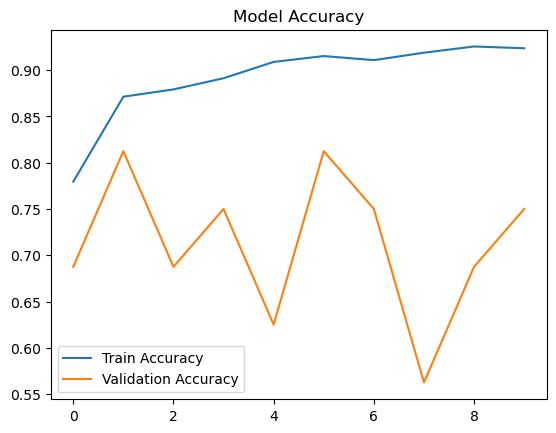

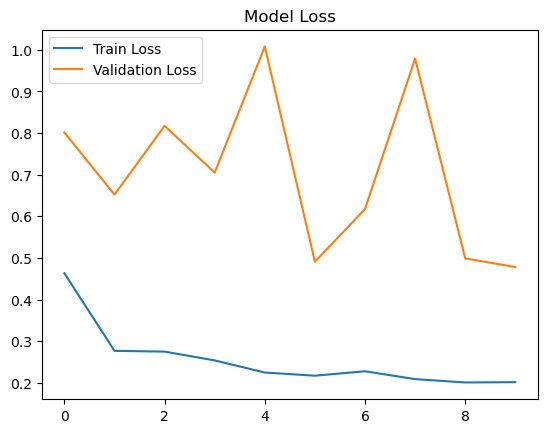

In [11]:
# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")
plt.show()


In [12]:
model.evaluate(test_generator)

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 349ms/step - accuracy: 0.8590 - loss: 0.3489 


[0.34891653060913086, 0.8589743375778198]

In [13]:
model.save("pneumonia_cnn_model.h5")


In [21]:
# Import ResNet50 and required layers

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
import numpy as np


In [22]:
# Get class labels from training generator
classes = train_generator.classes

# Compute class weights to handle imbalance
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(classes),
    y=classes
)

# Convert to dictionary format
class_weights = dict(enumerate(class_weights))

print("Class Weights:", class_weights)


Class Weights: {0: np.float64(1.9448173005219984), 1: np.float64(0.6730322580645162)}


In [23]:
# Load ResNet50 without top classification layer
base_model = ResNet50(
    weights='imagenet',
    include_top=False,        # Remove default classifier
    input_shape=(224, 224, 3)
)

# Freeze all base layers (feature extractor)
for layer in base_model.layers:
    layer.trainable = False

print("ResNet50 base model loaded and frozen.")


ResNet50 base model loaded and frozen.


In [24]:
# Add custom classification layers on top of ResNet

x = base_model.output
x = GlobalAveragePooling2D()(x)   # Reduces feature maps
x = Dense(128, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)   # Binary classification

# Create final model
resnet_model = Model(inputs=base_model.input, outputs=x)

resnet_model.summary()


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,850,113 (90.98 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [25]:
resnet_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [26]:
# Train model with class weights

resnet_history = resnet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,                   # Start with 5 epochs
    class_weight=class_weights  # Handle imbalance
)


Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 280s 2s/step - accuracy: 0.5897 - loss: 0.6664 - val_accuracy: 0.6250 - val_loss: 0.6578
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 266s 2s/step - accuracy: 0.7097 - loss: 0.6331 - val_accuracy: 0.6875 - val_loss: 0.6348
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 267s 2s/step - accuracy: 0.7427 - loss: 0.6067 - val_accuracy: 0.6250 - val_loss: 0.6204
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 374s 2s/step - accuracy: 0.7722 - loss: 0.5824 - val_accuracy: 0.6250 - val_loss: 0.6061
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.7630 - loss: 0.5635 - val_accuracy: 0.6250 - val_loss: 0.5942


In [27]:
resnet_loss, resnet_accuracy = resnet_model.evaluate(test_generator)

print("ResNet Test Accuracy:", resnet_accuracy)
print("ResNet Test Loss:", resnet_loss)


20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.7933 - loss: 0.5719
ResNet Test Accuracy: 0.7932692170143127
ResNet Test Loss: 0.5719150304794312


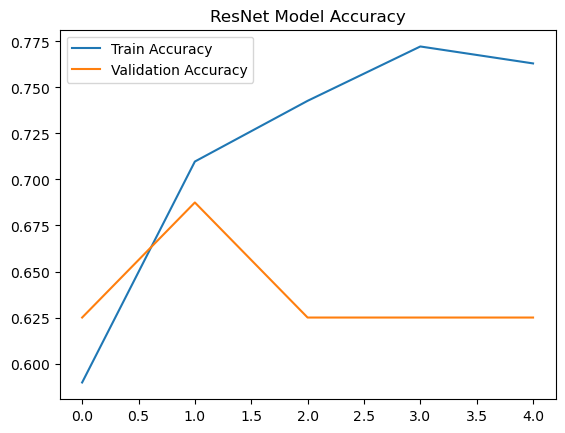

In [28]:
# Plot Training vs Validation Accuracy

plt.plot(resnet_history.history['accuracy'], label='Train Accuracy')
plt.plot(resnet_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("ResNet Model Accuracy")
plt.show()


In [29]:
resnet_model.save("pneumonia_resnet_model.keras")
print("ResNet Model Saved Successfully!")


ResNet Model Saved Successfully!


In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [31]:
# Reset test generator (important)
test_generator.reset()

# Get predictions
cnn_predictions = model.predict(test_generator)

# Convert probabilities to binary labels
cnn_pred_classes = (cnn_predictions > 0.5).astype("int32").ravel()

# True labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())


20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 423ms/step 


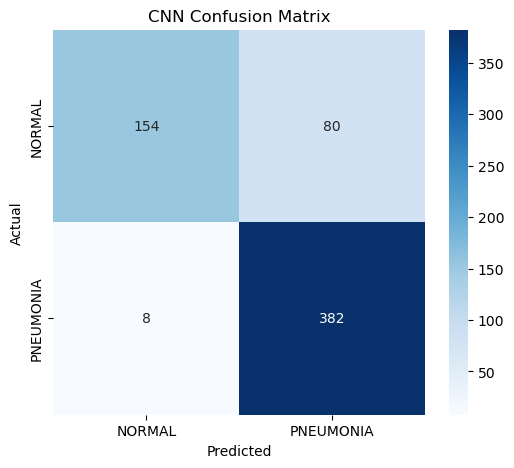

In [32]:
cnn_cm = confusion_matrix(true_classes, cnn_pred_classes)

plt.figure(figsize=(6,5))
sns.heatmap(cnn_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [33]:
print("CNN Classification Report:\n")
print(classification_report(true_classes, cnn_pred_classes, target_names=class_labels))


CNN Classification Report:

              precision    recall  f1-score   support

      NORMAL       0.95      0.66      0.78       234
   PNEUMONIA       0.83      0.98      0.90       390

    accuracy                           0.86       624
   macro avg       0.89      0.82      0.84       624
weighted avg       0.87      0.86      0.85       624



In [34]:
test_generator.reset()

resnet_predictions = resnet_model.predict(test_generator)

resnet_pred_classes = (resnet_predictions > 0.5).astype("int32").ravel()


20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step 


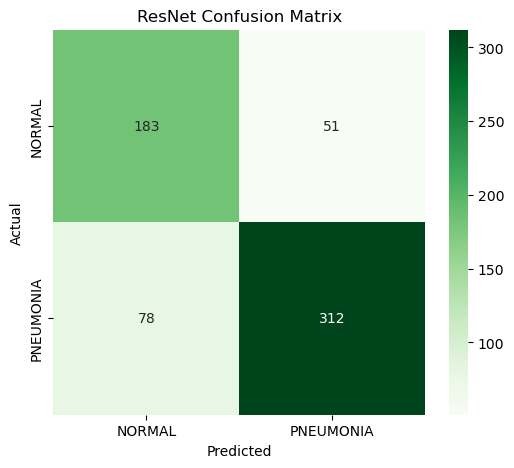

In [35]:
resnet_cm = confusion_matrix(true_classes, resnet_pred_classes)

plt.figure(figsize=(6,5))
sns.heatmap(resnet_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title("ResNet Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [36]:
print("ResNet Classification Report:\n")
print(classification_report(true_classes, resnet_pred_classes, target_names=class_labels))


ResNet Classification Report:

              precision    recall  f1-score   support

      NORMAL       0.70      0.78      0.74       234
   PNEUMONIA       0.86      0.80      0.83       390

    accuracy                           0.79       624
   macro avg       0.78      0.79      0.78       624
weighted avg       0.80      0.79      0.80       624

